In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import accuracy_score, f1_score

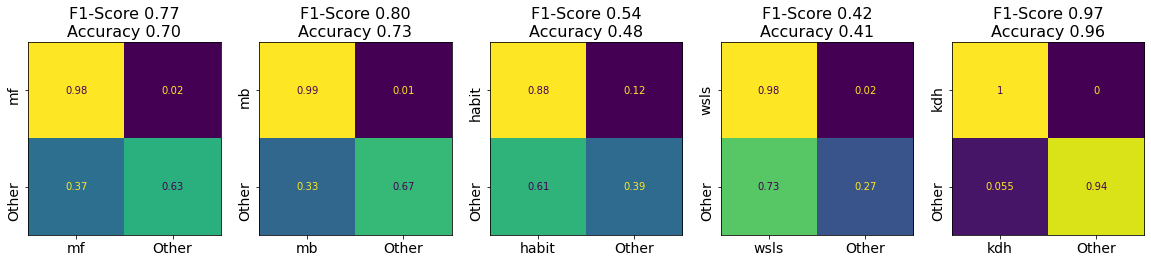

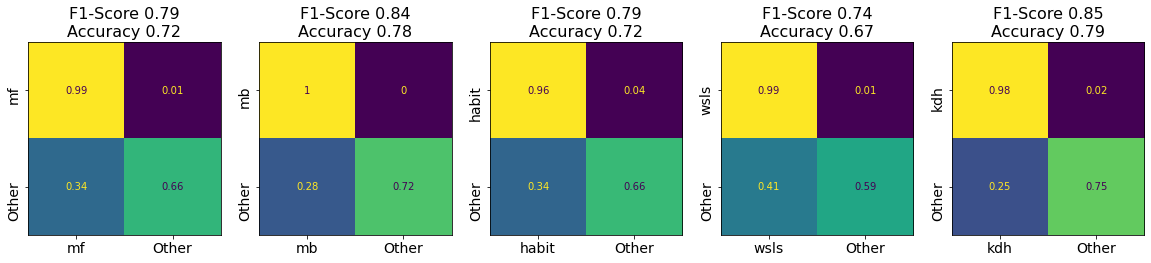

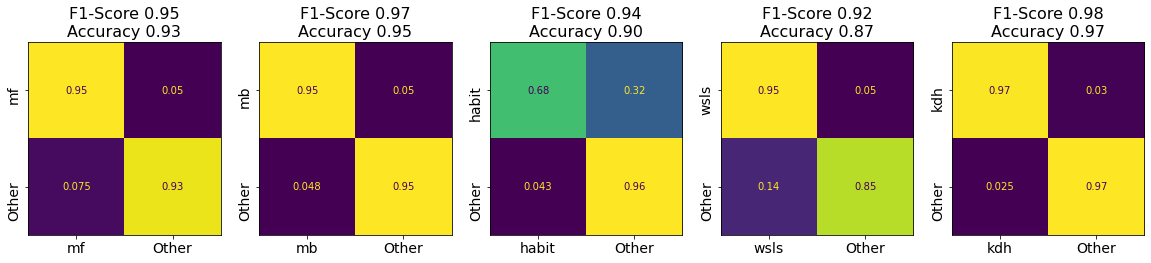

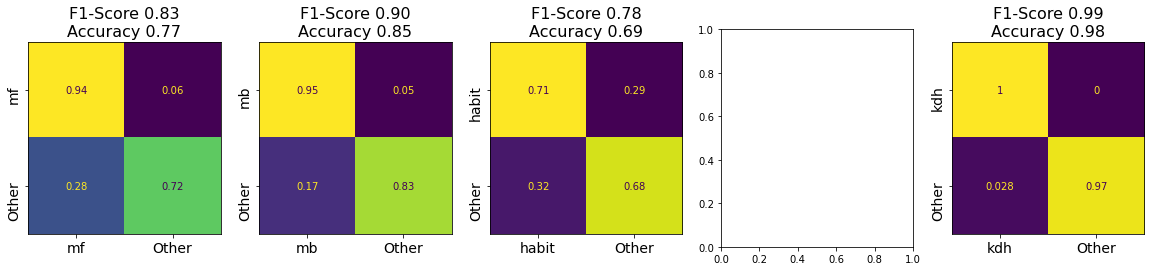

In [2]:
df = pd.read_csv('all_model_nlp.csv')
models = {
        'mf':['Model-Free'],
        'mb':['Model-Based'],
        'habit':['Habit'],
        'wsls':['Win Stay, Lose Shift'],
        'kdh':['k-Dominant Hand']
}

classification_by = ['test_nlp_rnn_100',
                     'test_nlp_rnn_1000',
                     'best_test_nlp_rnn',
                     'test_nlp_logistic_regression'] 

for j in classification_by:
    y_true = np.repeat([0,1,1,1,1],100)
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i,m in enumerate(models):
        if i == 3 and j == 'test_nlp_logistic_regression':
            y_true = np.roll(y_true,100)
            continue
        y_pred = (np.array(df[f'test_nlp_{m}'] - df[j]) > 0).astype(int)
        cm = ConfusionMatrixDisplay.from_predictions(ax=axes[i],y_true=y_true,y_pred=y_pred,
                                                display_labels=[m, 'Other'],
                                                colorbar=False,normalize='true',
                                               cmap="viridis")

        acc = accuracy_score(y_true=y_true,y_pred=y_pred)
        f1 = f1_score(y_true=y_true,y_pred=y_pred)
        axes[i].set_title('F1-Score {:.2f}\nAccuracy {:.2f}'.format(f1, acc),size=16)
        axes[i].set_xticklabels([m, 'Other'],rotation=0,size=14)
        axes[i].set_yticklabels([m, 'Other'],rotation=90,size=14)
        axes[i].set_xlabel('',size=16)
        axes[i].set_ylabel('',size=16)
        y_true = np.roll(y_true,100)